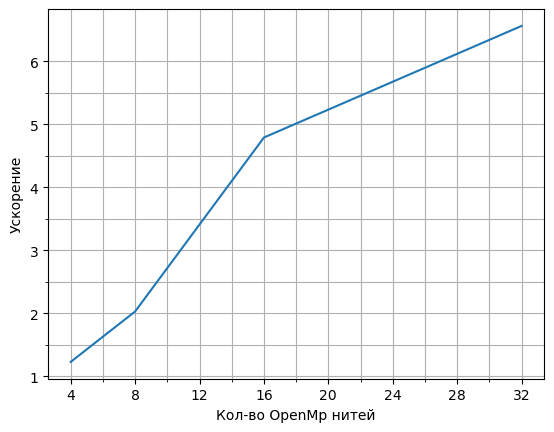

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = [4, 8, 16, 32]
y = [1.23, 2.03, 4.79, 6.56]
ax = plt.gca()
ticks = np.arange(4, 33, 4)
minor_ticks = np.arange(4, 33, 2)
ax.set_xticks(ticks)
ax.set_xticks(minor_ticks, minor=True)

minor_ticks = np.arange(1, 6, 0.5)

ax.set_yticks(minor_ticks, minor=True)
ax.set_xlabel('Кол-во OpenMp нитей')
ax.set_ylabel('Ускорение')

plt.grid(which='both')
plt.plot(x, y)

In [19]:
file = open('results/results10.txt', 'r')
lines = file.readlines()
file.close()
values = []
for line in lines:
    elems = []
    for elem in line.split():
        elems.append(float(elem))
    values.append(elems)
    

In [20]:
import numpy as np

x = np.linspace(-3.0, 3.0, len(values))
y = np.linspace(0.0, 2.0, len(values))

xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(values)

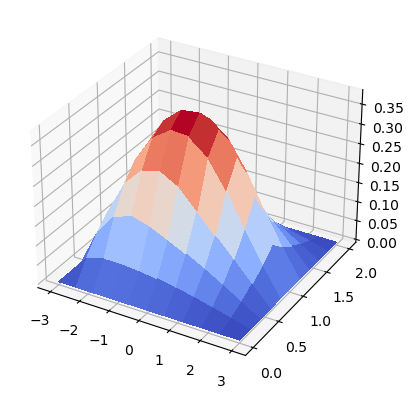

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.plot_surface(xgrid, ygrid, zgrid, cmap=cm.coolwarm,linewidth=0, antialiased=False,rstride=1, cstride=1)

plt.show()


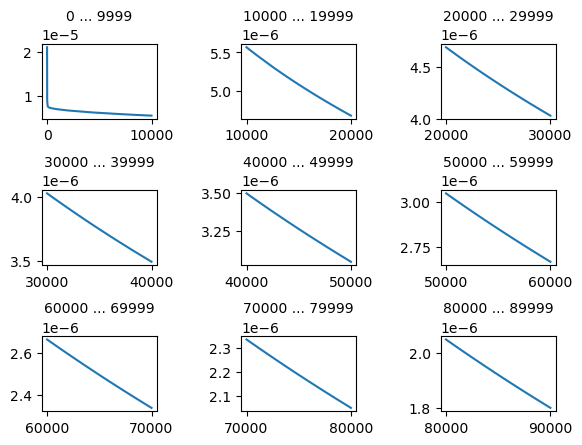

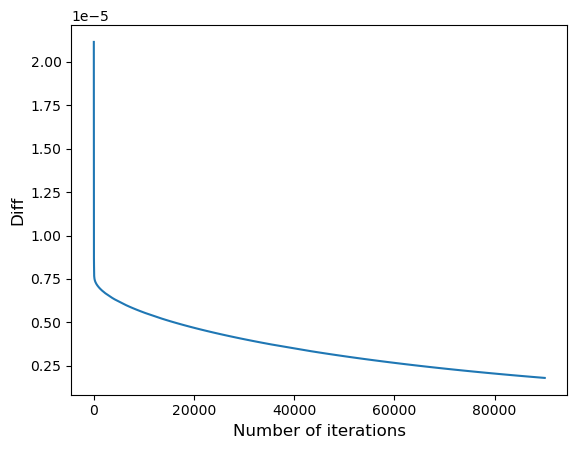

In [56]:
import os

files = os.listdir("diffs")
sorted_files = sorted(files)
TimesPerWrite = 10000 # Must be the same as in main.cpp file
x_common = np.array([])
y_common = np.array([])
fig, axs = plt.subplots(3, 3)
fig.tight_layout(pad=3.0)

for i, dif_file in enumerate(sorted_files):
    file = open("diffs/" + dif_file, 'r')
    y = np.array([float(d) for d in file.readlines()])
    y_common = np.append(y_common, y)
    size = len(y)
    fromIt = i * 10000
    x = np.linspace(fromIt, fromIt + TimesPerWrite - 1, size)
    x_common = np.append(x_common, x)
    file.close()

    axs[i // 3, i % 3].plot(x, y)
    axs[i // 3, i % 3].set_title(str(int(x[0])) + ' ... ' + str(int(x[size - 1])), fontsize=10)

plt.show()

fig = plt.figure()
plt.xlabel('Number of iterations', fontsize=12)
plt.ylabel('Diff', fontsize=12)
plt.plot(x_common, y_common)
plt.show()